Installation of Libraries

In [1]:
!pip install gradio
!pip install tensorflow
!pip install matplotlib
import gradio as gr
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.models import load_model
import PIL.Image as Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import (accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,confusion_matrix,roc_curve)
!pip install tensorflow medmnist
import medmnist
from medmnist import PneumoniaMNIST


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=49dae0c7a693c0b22c22a55d63e71828f4590a8929c4723542c33576726d1f91
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a934

In [2]:
IMAGE_SIZE=224
CHANNELS=3
BATCH_SIZE=32

Importing the Datasets

In [3]:
train_data=PneumoniaMNIST(split="train",download=True,size=224)
test_data=PneumoniaMNIST(split="test",download=True,size=224)
valid_data=PneumoniaMNIST(split="val",download=True,size=224)

100%|██████████| 214M/214M [00:17<00:00, 12.3MB/s]


Using downloaded and verified file: /root/.medmnist/pneumoniamnist_224.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist_224.npz


In [4]:
x_train=train_data.imgs
y_train=train_data.labels
x_test=test_data.imgs
y_test=test_data.labels
x_valid=valid_data.imgs
y_valid=valid_data.labels

In [5]:
print("Size of Training Set : {} ".format(len(x_train)))
print("Size of Testing Set : {} ".format(len(x_test)))
print("Size of Validation Set : {} ".format(len(x_valid)))


Size of Training Set : 4708 
Size of Testing Set : 624 
Size of Validation Set : 524 


Data Cleaning

In [6]:

x_train = tf.expand_dims(x_train, axis=-1)
x_valid = tf.expand_dims(x_valid, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_valid = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_valid))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

Data Visualization

In [7]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, '[0]')

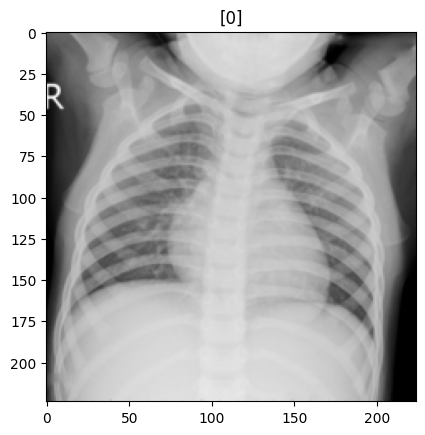

In [8]:
plt.imshow(x_train[20])
plt.title(y_train[20])

Text(0.5, 1.0, '[1]')

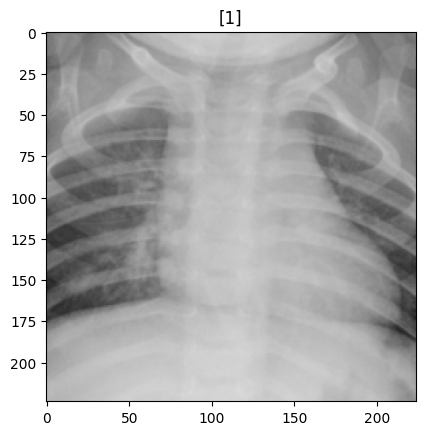

In [9]:
plt.imshow(x_train[50],cmap="gray")
plt.title(y_train[50])

Model Building

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE, CHANNELS))
base_model.trainable=False
model = tf.keras.Sequential(
    [base_model,
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64,activation='relu'),
     tf.keras.layers.Dense(32,activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = [
    ModelCheckpoint(filepath='model.keras', save_best_only=True, monitor='val_loss', mode='min',verbose=1),
    EarlyStopping(monitor='val_loss',mode='min', patience=5, restore_best_weights=True,verbose=1)
]
history=model.fit(x_train,y_train, validation_data=(x_valid,y_valid), epochs=35,callbacks = callback,verbose=1)
model.save('model.keras')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/35
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8826 - loss: 1.6153
Epoch 1: val_loss improved from inf to 0.06394, saving model to model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 49s 193ms/step - accuracy: 0.8830 - loss: 1.6078 - val_accuracy: 0.9714 - val_loss: 0.0639
Epoch 2/35
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9889 - loss: 0.0320
Epoch 2: val_loss did not improve from 0.06394
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9889 - loss: 0.0320 - val_accuracy: 0.9733 - val_loss: 0.0719
Epoch 3/35
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9951 - loss: 0.0161
Epoch 3: val_loss did not improve from 0.06394
148/148 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9637 - val_loss: 0.1470
Epoch 4/35
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9857 - loss: 0.0468
Epoch 4: val_loss did not improve from 0.06394
148/148 ━━━━━━━━━━━━━━━━━━

Model Evaluation

In [11]:
all_predictions = []
all_labels = []
for i in range(len(x_test)):
    image = np.expand_dims(x_test[i], axis=0)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    all_predictions.append(predicted_class)
    all_labels.append(y_test[i])
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

In [12]:
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)
print("Confusion Matrix: ")
print(confusion_matrix(all_labels,all_predictions))

Accuracy:  0.9038461538461539
F1 Score:  0.9003725478782234
Recall:  0.9038461538461539
Precision:  0.9155590503246753
Confusion Matrix: 
[[175  59]
 [  1 389]]


Model Deployment

In [13]:
model = load_model('model.keras')

In [15]:
def image_preprocess(image_path):
  img=Image.open(image_path).convert('RGB')
  img=img.resize((224,224))
  img=np.array(img)
  return img


def predict(image_path):
  img=image_preprocess(image_path)
  img=np.expand_dims(img,axis=0)
  pred=model.predict(img)
  pred_class=np.argmax(pred[0])
  if pred_class==0:
    return "Absence of Pneumonia"
  else:
    return "Presence of Pneumonia"
print(predict('/content/IM-0001-0001.jpeg'))
print(predict('/content/IM-0003-0001.jpeg'))
print(predict('/content/IM-0005-0001.jpeg'))
print(predict('/content/IM-0006-0001.jpeg'))
print(predict('/content/person3_bacteria_11.jpeg'))
print(predict('/content/person3_bacteria_12.jpeg'))
print(predict('/content/person3_bacteria_13.jpeg'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Absence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Absence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Absence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Absence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Presence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Presence of Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Presence of Pneumonia


In [16]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="filepath"),
    outputs=gr.Label(num_top_classes=2),
    title="AI Driven Medical Diagnosis of Pneumonia",
    description="Please Upload a Chest X Ray"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://137af3f9676f2f8854.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
